# Coordinate grid and $c_p$ Interpolation
#### (465 x 159) --> (256 x 128)

In [1]:
import torch as pt
from pathlib import Path
import os
from os.path import join
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 180

DATA_PATH = Path(os.path.abspath('')).parent / "data"
OUTPUT_PATH = Path(os.path.abspath('')).parent / "output" / "Interpolation"
ORIG_SHAPE = (465, 159)
TARGET_SHAPE = (256, 128)

#### Load coordinates and data

In [2]:
# load original coord grid
coords = pt.load(join(DATA_PATH, "coords.pt"))
xx_orig, yy_orig = coords[list(coords.keys())[0]]

# load interpolated coord grid
coords = pt.load(join(DATA_PATH, "coords_interp.pt"))
xx_new, yy_new = coords

# load original dataset
data = pt.load(join(DATA_PATH, "cp_084_500snaps.pt"))
slice_orig = data['ma0.84_alpha5.00'][:,:, 100]

# load interpolated dataset
data = pt.load(join(DATA_PATH, "cp_084_500snaps_interp.pt"))
slice_new = data['ma0.84_alpha5.00'][:,:, 100]

#### Plot grid resolution in comparison

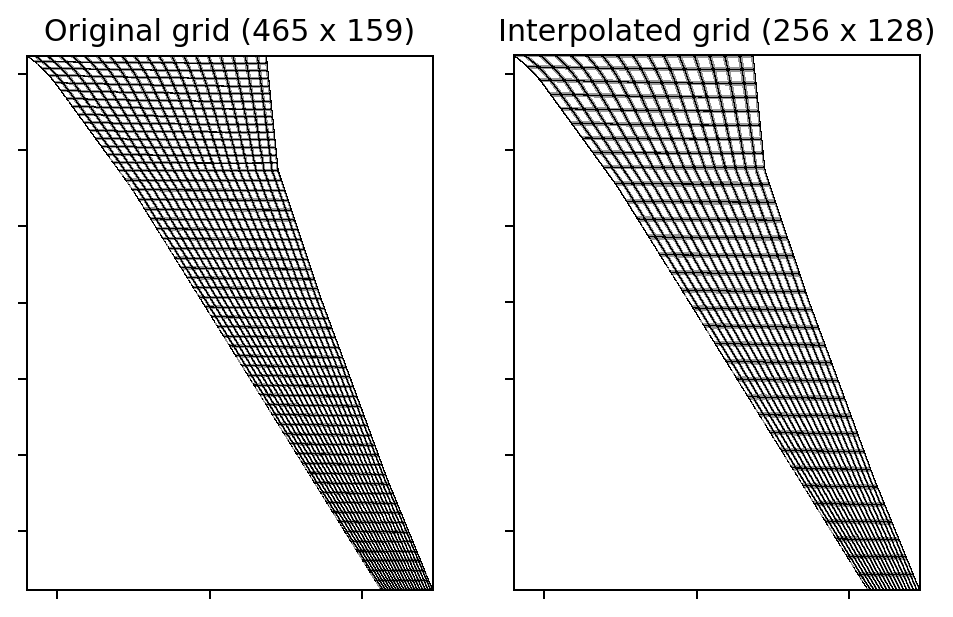

In [16]:
# construct values for visualisation
data_orig = pt.tensor([[1 if i%8 == 0 or j%8 == 0 or j == ORIG_SHAPE[1] - 1 else 0 for i in range(ORIG_SHAPE[0])] for j in range(ORIG_SHAPE[1])]).transpose(0, 1)
data_new = pt.tensor([[1 if i%8 == 0 or j%8 == 0 or j == TARGET_SHAPE[1] - 1 else 0 for i in range(TARGET_SHAPE[0])] for j in range(TARGET_SHAPE[1])]).transpose(0, 1)

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

levels = [0.01, 0.99]
ax1.contourf(xx_orig, yy_orig, data_orig, levels=levels, cmap="Greys", extend="both")
ax2.contourf(xx_new, yy_new, data_new, levels=levels, cmap="Greys", extend="both")

for ax in [ax1, ax2]:
    ax.set_aspect("equal")
    ax.set_xticklabels([])
    ax.set_yticklabels([])

ax1.set_title("Original grid (465 x 159)")
ax2.set_title("Interpolated grid (256 x 128)")
fig.tight_layout
fig.savefig(join(OUTPUT_PATH, "grid_interpolation.png"))

#### Plot timestep for compairson

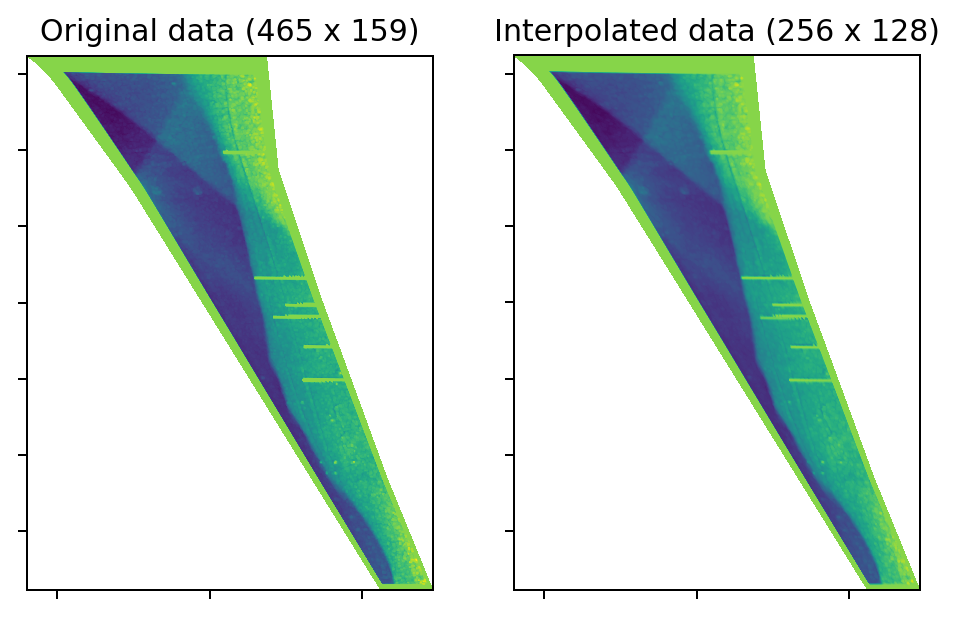

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

mean, std = slice_orig.mean(), slice_orig.std()
vmin, vmax = mean - 2*std, mean + 2*std
levels = pt.linspace(vmin, vmax, 120)

ax1.contourf(xx_orig, yy_orig, slice_orig, vmin=vmin, vmax=vmax,levels=levels, extend="both")
cont = ax2.contourf(xx_new, yy_new, slice_new, vmin=vmin, vmax=vmax, levels=levels, extend="both")

for ax in [ax1, ax2]:
    ax.set_aspect("equal")
    ax.set_xticklabels([])
    ax.set_yticklabels([])

# fig.colorbar(cont)
ax1.set_title("Original data (465 x 159)")
ax2.set_title("Interpolated data (256 x 128)")
fig.tight_layout
fig.savefig(join(OUTPUT_PATH, "interpolation_comparison.png"))